# numpy로 원주율값 구하기

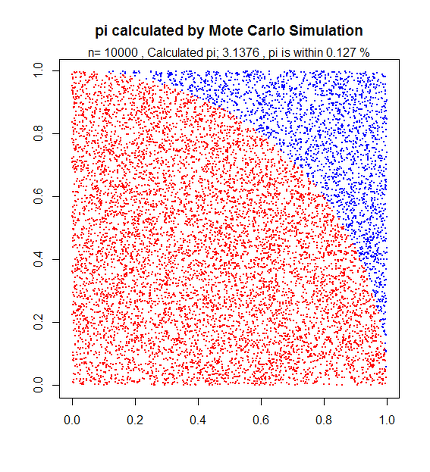
이미지 출처 : https://byun1114.tistory.com/1071

- 충분히 많은 점을 랜덤으로 찍을때, 네모의 1/4 넓이 안에 들어갈 확률은 4분원의 크기를 네모의 크기로 나눈 값과 같다.
- 이를 활용해 원주율값을 구할 수 있다.

In [1]:
import numpy as np

- 원의 넓이는 1 * 1 이므로 1
- 4분원의 넓이는 원의 넓이인 𝝅 * R의 제곱을 4로 나눈 값이다.
- 즉 𝝅/4 가 된다.  (현재 네모에서 R은 1)

- **원의 넓이 : 네모의 넓이**


pi / 4 : 1 = (4분원 안에 생성된 점의 개수) : 전체 (점을 찍는)시도 횟수

pi = 4 * (4분원 안에 생성된 점의 개수) / 전체 시도 횟수

## 랜덤으로 점을 찍는 총 횟수 표현

In [2]:
# 전체 시도 횟수를 천만번 (10의 7제곱)이라 가정
total_trial = int(1e7)

# 점을 찍은 횟수
# 0 ~ 1 사이의 값을 가져오기 위해 rand사용
points = np.random.rand(total_trial,2)

points

array([[0.49354421, 0.75833051],
       [0.86829397, 0.92375882],
       [0.72372899, 0.3364979 ],
       ...,
       [0.27542163, 0.9882378 ],
       [0.06996705, 0.31490832],
       [0.55447043, 0.12300586]])

In [3]:
# 행은 1000만개,  열은 2개가 있는 행렬 생성
# 열은 x,y 좌표, 10000만개는 각각의 점을 의미
points.shape

(10000000, 2)

## 4분원의 넓이 구하기

- 위의 그림에서 파란선 안쪽의 범위
- x^2 + y^2이 >= 1이면 원안의 좌표이다.

In [4]:
# 각 점의 제곱한 값
points ** 2

# 여기서 제곱한 값에서 x + y를 계산해야 한다. -> np.sum활용 

array([[0.24358589, 0.57506517],
       [0.75393442, 0.85333036],
       [0.52378365, 0.11323084],
       ...,
       [0.07585707, 0.97661396],
       [0.00489539, 0.09916725],
       [0.30743746, 0.01513044]])

In [5]:
# 행렬에서 '열' 을 따라 계산 (axis=1)
np.sum(points ** 2, axis=1)

array([0.81865105, 1.60726477, 0.63701449, ..., 1.05247103, 0.10406264,
       0.3225679 ])

위의 값이 1보다 작으면 원 안에 들어가는 것

In [6]:
# x+y가 1보다 작은지 필터링
np.sum(points ** 2, axis=1) < 1

array([ True, False,  True, ..., False,  True,  True])

- np.sum(points ** 2, axis=1) 의 결과는 벡터
- ~ <1 의 결과는 scalar 이다. 
- 따라서 numpy broadcasting이 적용되면서 boolean이 된다.
---
- 여기서 최종적으로 알고자 하는 것은 1이상인 수의 '개수' 이다. -> np.sum() 활용 (True는 1인 것을 활용)

In [7]:
# 천만개의 점중에서 4분원 안에 들어간 점의 개수
np.sum(np.sum(points ** 2, axis=1) < 1)

7851866

pi = 4 * (4분원 안에 생성된 점의 개수) / 전체 시도 횟수

In [8]:
4 * np.sum(np.sum(points ** 2, axis=1) < 1) / total_trial

3.1407464

완벽하게 pi의 값이 정확하게 나오지는 않지만 근사치의 값은 구할 수 있다.